In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None

%matplotlib inline

In [2]:
df = pd.read_csv(r"E:\jupyter-workspace\datas\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,5322-TEUJK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [5]:
len(df)

7043

In [6]:
df.drop(index=df[df.TotalCharges == " "].index, inplace=True)

In [7]:
len(df)

7032

In [8]:
df.TotalCharges = df.TotalCharges.astype(np.float)

In [9]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

In [10]:
df.Churn.replace(to_replace="Yes", value=1, inplace=True)
df.Churn.replace(to_replace="No", value=0, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null int64
dtypes: float64(2), int64(3), obj

In [12]:
df.groupby("gender")["Churn"].sum()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [13]:
df.groupby("gender")["Churn"].sum().reset_index()

,gender,Churn
0,Female,939
1,Male,930


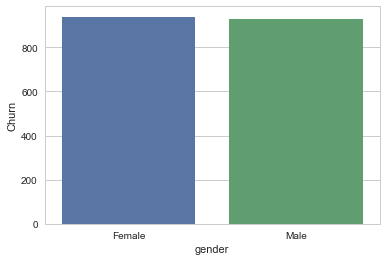

In [14]:
sns.set(style="whitegrid")
sns.barplot(df.groupby("gender")["Churn"].sum().reset_index()["gender"], df.groupby("gender")["Churn"].sum().reset_index()["Churn"])

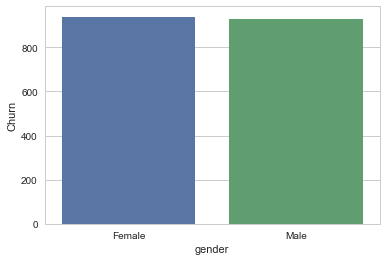

   gender  customerID
0  Female        3483
1    Male        3549


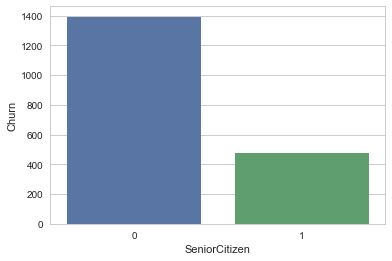

   SeniorCitizen  customerID
0              0        5890
1              1        1142


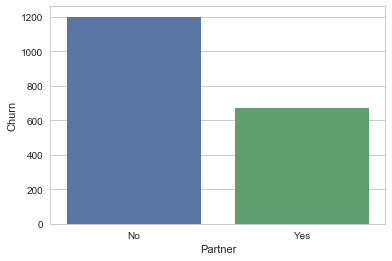

  Partner  customerID
0      No        3639
1     Yes        3393


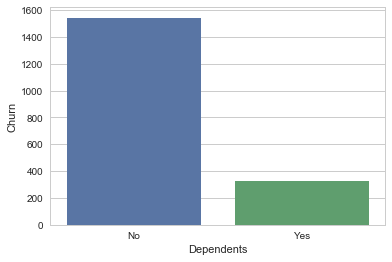

  Dependents  customerID
0         No        4933
1        Yes        2099


In [15]:
dem = ["gender", "SeniorCitizen", "Partner", "Dependents"]

for i in dem:
    sns.barplot(x = df.groupby(i)["Churn"].sum().reset_index()[i], 
               y = df.groupby(i)["Churn"].sum().reset_index()["Churn"])
    plt.show()
    print(df.groupby(i)["customerID"].count().reset_index())

In [16]:
cat = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

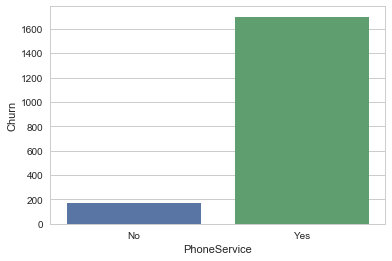

  PhoneService  customerID
0           No         680
1          Yes        6352


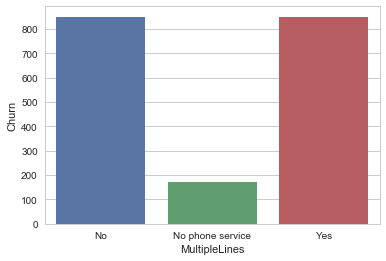

      MultipleLines  customerID
0                No        3385
1  No phone service         680
2               Yes        2967


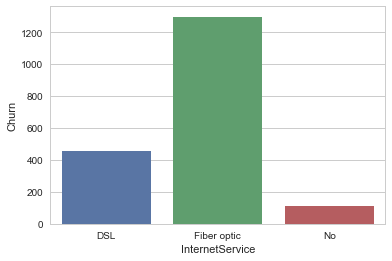

  InternetService  customerID
0             DSL        2416
1     Fiber optic        3096
2              No        1520


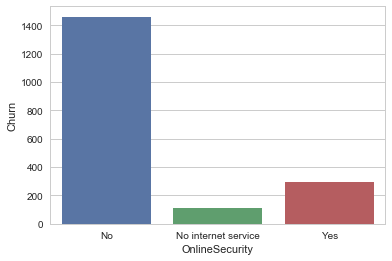

        OnlineSecurity  customerID
0                   No        3497
1  No internet service        1520
2                  Yes        2015


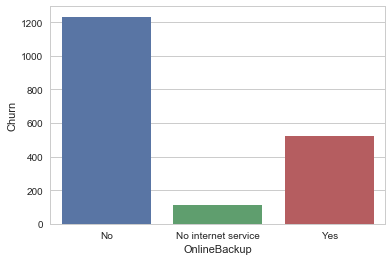

          OnlineBackup  customerID
0                   No        3087
1  No internet service        1520
2                  Yes        2425


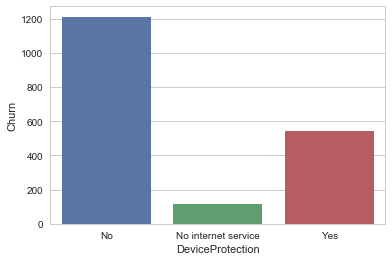

      DeviceProtection  customerID
0                   No        3094
1  No internet service        1520
2                  Yes        2418


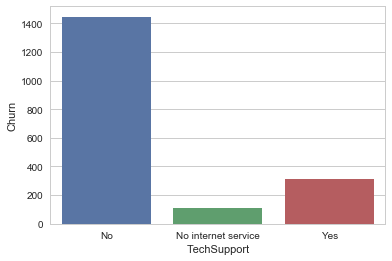

           TechSupport  customerID
0                   No        3472
1  No internet service        1520
2                  Yes        2040


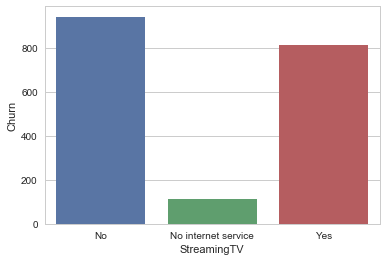

           StreamingTV  customerID
0                   No        2809
1  No internet service        1520
2                  Yes        2703


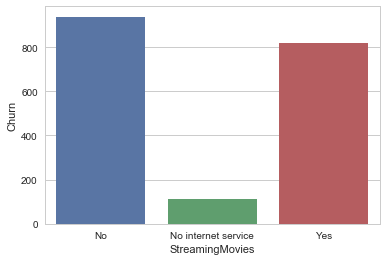

       StreamingMovies  customerID
0                   No        2781
1  No internet service        1520
2                  Yes        2731


In [17]:
for i in cat:
    sns.barplot(x = df.groupby(i)["Churn"].sum().reset_index()[i],
               y = df.groupby(i)["Churn"].sum().reset_index()["Churn"])
    plt.show()
    print(df.groupby(i)["customerID"].count().reset_index())

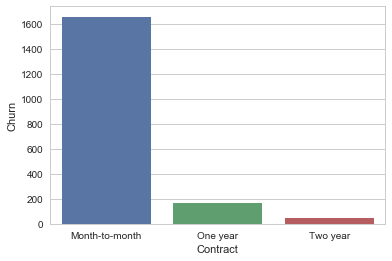

         Contract  customerID
0  Month-to-month        3875
1        One year        1472
2        Two year        1685


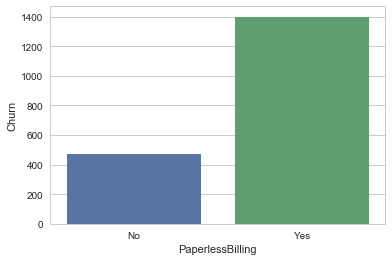

  PaperlessBilling  customerID
0               No        2864
1              Yes        4168


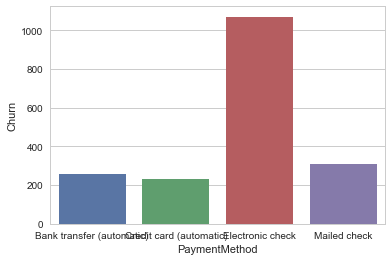

               PaymentMethod  customerID
0  Bank transfer (automatic)        1542
1    Credit card (automatic)        1521
2           Electronic check        2365
3               Mailed check        1604


In [18]:
pay = ['Contract','PaperlessBilling','PaymentMethod']
for i in pay:
    sns.barplot(x = df.groupby(i)["Churn"].sum().reset_index()[i], 
               y = df.groupby(i)["Churn"].sum().reset_index()["Churn"])
    plt.show()
    
    print(df.groupby(i)["customerID"].count().reset_index())

In [19]:
s = pd.Series(list('abca'))

In [20]:
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [21]:
pd.get_dummies(df["MultipleLines"])

,No,No phone service,Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,1,0
8,0,0,1
9,1,0,0


In [22]:
cat_X = df[['MultipleLines','InternetService','OnlineSecurity','OnlineBackup',\
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',\
           'Contract','PaymentMethod']]
for i in cat_X:
    cat_X = pd.concat([cat_X, pd.get_dummies(cat_X[i], drop_first=False, prefix=i)], axis=1)

In [23]:
cat_X = cat_X.drop(labels=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
           'Contract','PaymentMethod'],axis=1)
    

In [24]:
features = pd.concat([df[['tenure','Partner','Dependents','gender','PhoneService',
                          'PaperlessBilling','MonthlyCharges','TotalCharges']], cat_X], axis=1)

In [25]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 39 columns):
tenure                                     7032 non-null int64
Partner                                    7032 non-null object
Dependents                                 7032 non-null object
gender                                     7032 non-null object
PhoneService                               7032 non-null object
PaperlessBilling                           7032 non-null object
MonthlyCharges                             7032 non-null float64
TotalCharges                               7032 non-null float64
MultipleLines_No                           7032 non-null uint8
MultipleLines_No phone service             7032 non-null uint8
MultipleLines_Yes                          7032 non-null uint8
InternetService_DSL                        7032 non-null uint8
InternetService_Fiber optic                7032 non-null uint8
InternetService_No                         7032 non-null uint8
On

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin


class ValueReplace(BaseEstimator, TransformerMixin):

    def __init__(self, attributes, replacements={"Yes": 1, "No": 0}):
        self.replacements = replacements
        self.attributes = attributes

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        for attr in self.attributes:
            for k in self.replacements.keys():
                X[attr].replace(k, self.replacements[k], inplace=True)
        return X


In [27]:
binarys = ["Partner", "Dependents", "gender", "PhoneService", "PaperlessBilling"]
vr = ValueReplace(binarys)
features = vr.fit_transform(features)
vr = ValueReplace(binarys, replacements={"Male":1, "Female":0})
features = vr.fit_transform(features)

In [28]:
features.head()

,tenure,Partner,Dependents,gender,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,0,0,0,1,29.85,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,34,0,0,1,1,0,56.95,1889.50,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,2,0,0,1,1,1,53.85,108.15,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,45,0,0,1,0,0,42.30,1840.75,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,2,0,0,0,1,1,70.70,151.65,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [29]:
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
import pydotplus
from io import StringIO
from IPython.display import Image

In [30]:
X = features
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
tree_clf = tree.DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

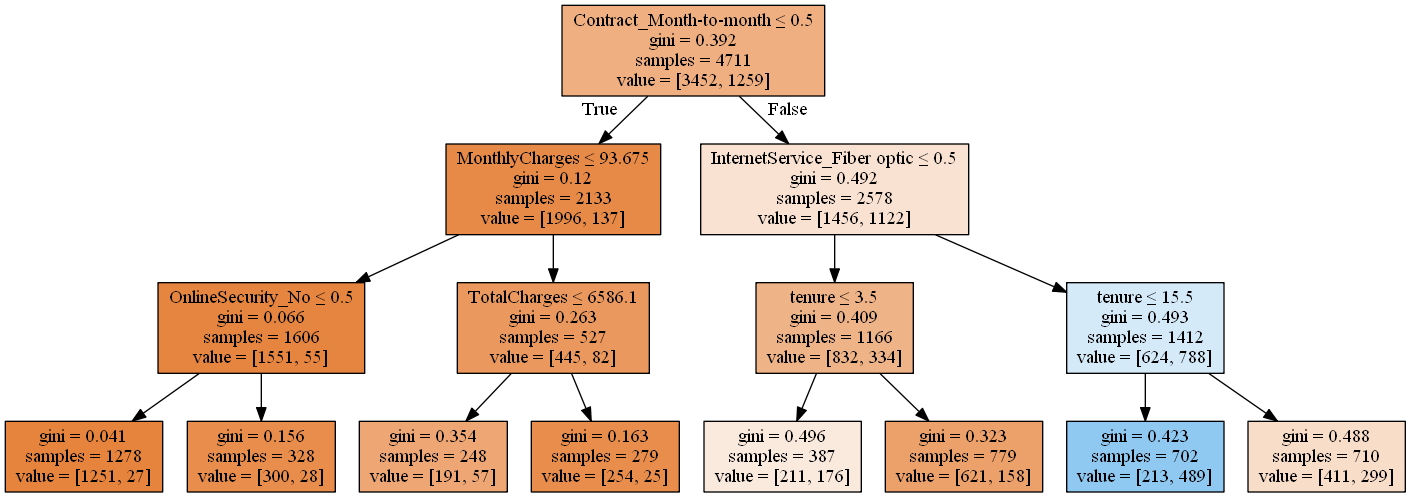

In [32]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features.columns, filled=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [34]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [38]:
params_grid = [{"max_depth":np.linspace(1, 50, 50)}]

grid_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), param_grid=params_grid, cv=10, verbose=5, n_jobs=2)
grid_cv.fit(X, y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    6.3s
[Parallel(n_jobs=2)]: Done 107 tasks      | elapsed:   10.1s
[Parallel(n_jobs=2)]: Done 287 tasks      | elapsed:   19.7s
[Parallel(n_jobs=2)]: Done 497 out of 500 | elapsed:   30.7s remaining:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:   30.8s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [39]:
grid_cv.best_params_

{'max_depth': 4.0}

In [40]:
tree_clf = tree.DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)
print(tree_clf.score(X_train,y_train))
print(tree_clf.score(X_test, y_test))

0.7979197622585439
0.7893149504523912


In [42]:
imp = pd.Series(tree_clf.feature_importances_, index=features.columns)

In [44]:
imp.sort_values(ascending=False)

Contract_Month-to-month                    0.567821
InternetService_Fiber optic                0.166536
tenure                                     0.154749
TotalCharges                               0.037221
DeviceProtection_No internet service       0.022023
MonthlyCharges                             0.020653
PaymentMethod_Electronic check             0.017247
MultipleLines_No phone service             0.009944
OnlineSecurity_No                          0.003807
InternetService_DSL                        0.000000
OnlineSecurity_No internet service         0.000000
InternetService_No                         0.000000
MultipleLines_No                           0.000000
MultipleLines_Yes                          0.000000
OnlineBackup_No                            0.000000
PaperlessBilling                           0.000000
PhoneService                               0.000000
gender                                     0.000000
Dependents                                 0.000000
Partner     

In [45]:
y_pred = tree_clf.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix


In [47]:
cm = confusion_matrix(y_test, y_pred)

In [51]:
cm

array([[1540,  171],
       [ 318,  292]], dtype=int64)

Text(52,0.5,'Predict')

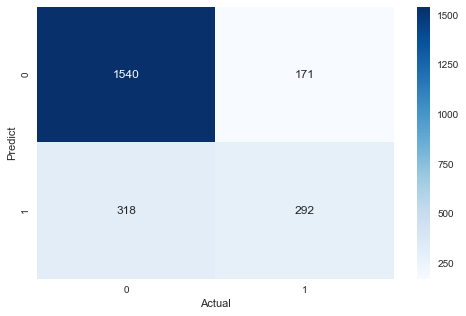

In [54]:
fig = plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predict")

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.7893149504523912
0.4786885245901639


In [61]:
y_pred_proba = tree_clf.predict_proba(X_test)
fpr,tpr, threshold = roc_curve(y_test, y_pred_proba[:,1])

0.819154746050148


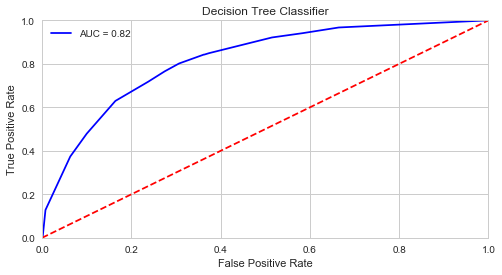

In [73]:
plt.figure(figsize=(8, 4))
plt.axis([0, 1, 0, 1])
auc_score = auc(fpr, tpr)
print(auc_score)
plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % auc_score)
plt.plot([0,1], [0,1], "r--")

plt.title("Decision Tree Classifier")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend()

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [75]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
print(rf_clf.score(X_train, y_train))
print(rf_clf.score(X_test, y_test))

0.9777117384843982
0.7798362774666092


In [77]:
n_estimators = np.arange(10, 1000, 10)
max_depth = np.arange(1, 25, 2)
min_samples_split = [2, 4, 8]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

grid = {"n_estimators":n_estimators, 
       "max_depth": max_depth,
       "min_samples_split":min_samples_split,
       "min_samples_leaf": min_samples_leaf,
       "bootstrap":bootstrap}
rf_random = RandomizedSearchCV(estimator=rf_clf, param_distributions=grid, n_iter=100, cv= 3,
                              verbose=3, random_state=42, n_jobs=2)
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  4.8min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed: 10.2min
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed: 11.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=2,
          param_distributions={'n_estimators': array([ 10,  20, ..., 980, 990]), 'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]), 'min_samples_split': [2, 4, 8], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=3)

In [78]:
print(rf_random.best_score_)
print(rf_random.best_params_)

0.8030432309442548
{'n_estimators': 710, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 9, 'bootstrap': True}


In [86]:
rf_clf = RandomForestClassifier(n_estimators=710, min_samples_split=8, min_samples_leaf=4, max_depth=9, bootstrap=True)
rf_clf.fit(X_train, y_train)
print(rf_clf.score(X_train, y_train))
print(rf_clf.score(X_test, y_test))

0.8410104011887073
0.8018095648427402


In [81]:
print(rf_clf.score(X_train, y_train))
print(rf_clf.score(X_test, y_test))

0.73275313097007
0.7371822490305903


In [87]:
y_pred = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [88]:
accuracy_score(y_test, y_pred)

0.8018095648427402

In [89]:
recall_score(y_test,y_pred)

0.5098360655737705

Text(34,0.5,'Accucary')

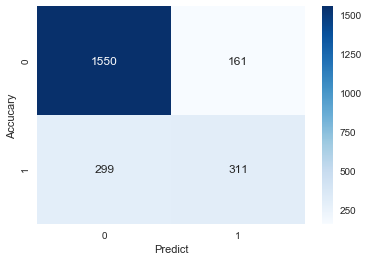

In [93]:
sns.heatmap(cm, annot=True, fmt="g", cmap=plt.cm.Blues)
plt.xlabel("Predict")
plt.ylabel("Accucary")